In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(
    'logistic_regression_data.csv'
    , header = None)
pol = None

In [2]:
data.columns = ['x1', 'x2', 'y']

X = np.matrix(data[['x1', 'x2']].values)
Y = np.matrix(data.y.values).T

def transform(X, pol = None):
    X2 = X.copy()
    if pol:
        for i in range(pol-1):
            X = np.hstack((X, np.power(X2, i+2)))
    X = np.hstack((np.ones((len(X), 1)), X))
    
    return X

X = transform(X, pol = pol)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0.5, 0, 'loglikelihood')

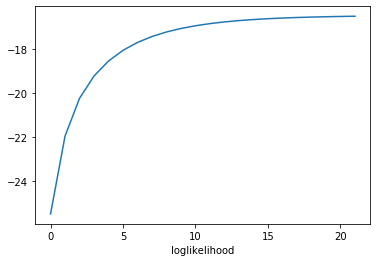

In [3]:
m0 = np.matrix([0,-1,0]).T
S0 = np.eye(X.shape[1])*0.1
sig0 = 0.3
w = m0

# Solução MAP usando IRLS
errs = []
err = 1;old_err = 2;
while abs(err - old_err) > 0.01:
    old_err = err
    R = np.eye(len(X))
    np.fill_diagonal(R, sigmoid(X @ w))
    Grad = -X.T @ (Y - sigmoid(X @ w)) + np.linalg.inv(S0) @ (w - m0)
    A = X.T @ R @ X + np.linalg.inv(S0)
    w  = w - np.linalg.inv(A) @ Grad    
    err = Y.T @ np.log(sigmoid(X @ w)) + (1 - Y).T @ np.log(1 - sigmoid(X @ w))
    errs.append(err[0, 0])
    
w

import matplotlib.pyplot as plt
plt.plot(errs)
plt.xlabel('loglikelihood')

In [4]:
# Passo de Predição - Aproximação probit
mi_a = X @ w
R = np.eye(len(R))
np.fill_diagonal(R, sigmoid(X @ w))
H = X.T @ R @ X + np.linalg.inv(S0)
sig2_a = X @ np.linalg.inv(H) @ X.T

Text(0.5, 0, 'Predito')

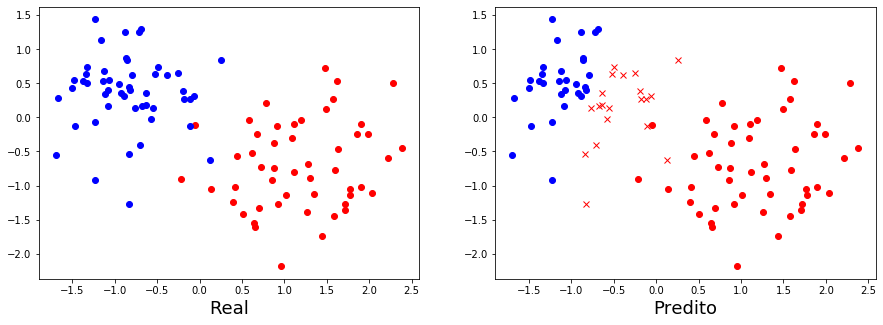

In [5]:
from scipy.linalg import sqrtm
P = sigmoid(sqrtm(1 + np.pi*sig2_a/8) @ mi_a)

Y_hat = (P > 0.5)*1

colors = {
    0: 'red',
    1: 'blue'
}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = [15, 5])
for i in range(len(Y)):
    ax[0].plot(
        X[i, 1], X[i, 2], 
        linestyle = '', 
        marker = 'o', 
        color = colors[int(Y[i, 0])]
    )
    ax[1].plot(
        X[i, 1], X[i, 2], 
        linestyle = '', 
        marker = 'o' if (int(Y_hat[i, 0]) == int(Y[i, 0])) else 'x', 
        color = colors[int(Y_hat[i, 0])]
    )
    
ax[0].set_xlabel('Real', fontsize = 18)
ax[1].set_xlabel('Predito', fontsize = 18)